<a href="https://colab.research.google.com/github/Untick/resume-builder-gr2/blob/main/Kirill_Samokhin/Samokhin_Usedesk1_Dataset1_%D0%9D%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
print(np.__version__)

1.23.5


In [ ]:
# Запустить эту ячейку, затем перезапустить среду
%%capture
pip install --upgrade numpy

In [ ]:
import numpy as np # Работа с массивами данных
import pandas as pd # Работа с табличными данными
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
#from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop # Оптимизаторы
from sklearn.preprocessing import StandardScaler # Масштабирование данных
import matplotlib.pyplot as plt # Отрисовка графиков
import time
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras import backend as K
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,precision_recall_curve, ConfusionMatrixDisplay
import seaborn as sns




In [ ]:
# Check the number of occurrences of y = 1 in y_train and y_test
def occurrences (y_train, y_test):
  # Count the number of occurrences of y_train
  unique, counts = np.unique(y_train, return_counts=True)
  # Print the counts of occurrences of y_train
  for val, count in zip(unique, counts):
      print(f"{val}: {count}")
      if val == 1:
        count_y1_in_train = count

  # Count the number of occurrences of y_test
  unique, counts = np.unique(y_test, return_counts=True)
  for val, count in zip(unique, counts):
      print(f"{val}: {count}")
      if val == 1:
        count_y1_in_test = count

  count_1_elements_20_persent = 0
  count_1_elements_20_persent =  (count_y1_in_train + count_y1_in_test)*0.2
  result = "    Distribution is correct " if round(count_1_elements_20_persent) == round(count_y1_in_test) else "    Distribution is false"
  print("20% of sum in 1 in y_train and y_test is:", round(count_1_elements_20_persent), result)


In [ ]:
# Функция для подсчета F1-меры
def my_f1_score(precision, recall):
    my_f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return my_f1_val

In [ ]:
# Функция для подсчета F1-меры для использования в модели
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# Функция для вывода результата, если нужен Argmax
def my_display_result_argmax(y_test, y_pred):
    y_test_argmax = np.argmax(y_test, axis=1)
    y_pred_argmax = np.argmax(y_pred, axis=1)
    y_pred_argmax = np.argmax(y_pred, axis=1)
    plt.figure(figsize=(6,3))
    sns.heatmap(confusion_matrix(y_test_argmax, y_pred_argmax), xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], annot=True, fmt='d')
    my_precision_score = precision_score(y_test_argmax,y_pred_argmax)
    my_recall_score = recall_score(y_test_argmax,y_pred_argmax)
    my_f1 = my_f1_score(my_precision_score, my_recall_score)
    print('precision score: ', my_precision_score)
    print('recall score: ', my_recall_score)
    print('f1 score: ', my_f1)

In [ ]:
x = pd.read_csv('/content/sample_data/X.csv',  low_memory=False) #index_col=0,
y = pd.read_csv('/content/sample_data/y1.csv',  low_memory=False) #index_col=0,

In [ ]:
print(x.shape)
print(y.shape)


(2256, 40)
(2256, 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

occurrences (y_train, y_test) # Check distribution of y=1 values between y_rain and y_test

0: 258
1: 870
0: 258
1: 870
20% of sum in 1 in y_train and y_test is: 348     Distribution is false


In [ ]:
CLASS_COUNT=2
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(1128, 2)
(1128, 2)


In [ ]:
number_of_cols = x_train.shape[1]

model_1_1 = Sequential()                                            # Создание последовательной модели нейросети
model_1_1.add(Dense(1024, input_dim=number_of_cols, activation="relu"))  # Первый полносвязный слой
model_1_1.add(BatchNormalization())
model_1_1.add(Dense(256, activation="relu"))
model_1_1.add(Dropout(0.1))
model_1_1.add(Dense(128, activation="relu"))
model_1_1.add(Dense(2, activation='sigmoid'))             # Выходной полносвязный слой
model_1_1.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=[f1_score])
model_1_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              41984     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                        

Epoch 1/250
9/9 [==============================] - 2s 60ms/step - loss: 0.6505 - f1_score: 0.7044 - val_loss: 0.6429 - val_f1_score: 0.7289
Epoch 2/250
9/9 [==============================] - 0s 29ms/step - loss: 0.5167 - f1_score: 0.7732 - val_loss: 0.6266 - val_f1_score: 0.7410
Epoch 3/250
9/9 [==============================] - 0s 24ms/step - loss: 0.4661 - f1_score: 0.7828 - val_loss: 0.6129 - val_f1_score: 0.7851
Epoch 4/250
9/9 [==============================] - 0s 27ms/step - loss: 0.4365 - f1_score: 0.7857 - val_loss: 0.6030 - val_f1_score: 0.8015
Epoch 5/250
9/9 [==============================] - 0s 24ms/step - loss: 0.4107 - f1_score: 0.8013 - val_loss: 0.5945 - val_f1_score: 0.8050
Epoch 6/250
9/9 [==============================] - 0s 26ms/step - loss: 0.3934 - f1_score: 0.8050 - val_loss: 0.5855 - val_f1_score: 0.8188
Epoch 7/250
9/9 [==============================] - 0s 23ms/step - loss: 0.3731 - f1_score: 0.8102 - val_loss: 0.5756 - val_f1_score: 0.8288
Epoch 8/250
9/9 [===

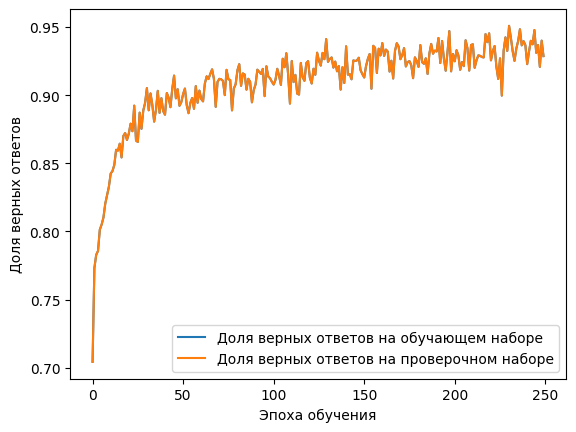

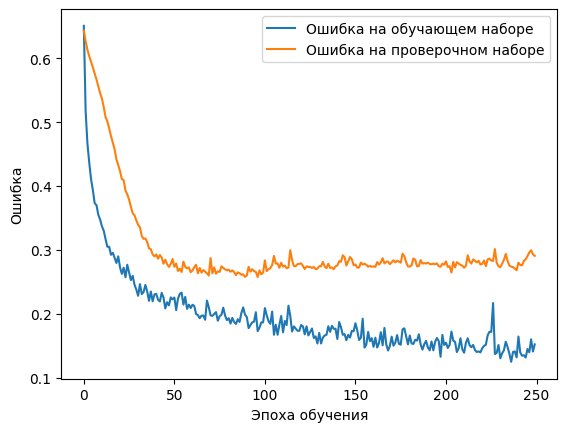

In [ ]:
import time
start_time = time.time() # счетчик времени
history_1 = model_1_1.fit(x_train,
                        y_train,                               # Метки классов обучающей выборки
                        epochs=250,                             # Количество эпох
                        batch_size=128,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_test, y_test))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history_1.history['f1_score'])) # print the highest accuracy achieved by the model

plt.plot(history_1.history['f1_score'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_1.history['f1_score'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history_1.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history_1.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

36/36 [==============================] - 0s 2ms/step
precision score:  0.9333333333333333
recall score:  0.9333333333333333
f1 score:  0.933333283333336


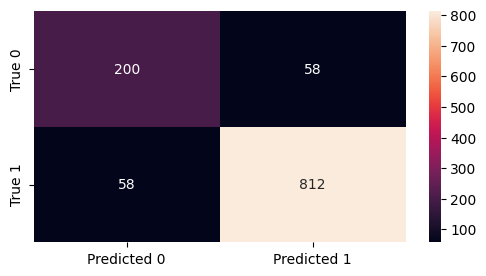

In [ ]:
y_pred = model_1_1.predict(x_test) # predict probabilities for each class
y_pred_PositiveClass = y_pred[:,1] # only  positive class predictions
my_display_result_argmax(y_test, y_pred)